In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df3 = pd.read_csv('HousingData.csv')

In [27]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [48]:
df3.columns = df3.columns.str.strip()

In [49]:
df3.isnull().sum()[df3.isnull().sum()>0]

CRIM     20
ZN       20
INDUS    20
CHAS     20
AGE      20
LSTAT    20
dtype: int64

In [50]:
df3.shape

(506, 14)

In [31]:
df_copy = df
df_copy.dropna(inplace=True)
df_copy.shape

(394, 14)

In [51]:
df3.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [35]:
df2['INDUS'].unique().size

77

In [52]:
df3[['CRIM','AGE','LSTAT','INDUS']] = df3[['CRIM','AGE','LSTAT','INDUS']].apply(lambda x:x.fillna(x.mean()))
for col in ['ZN', 'CHAS']:
    df3[col] = df3[col].fillna(df3[col].mode()[0])

In [53]:
df3.shape

(506, 14)

In [54]:
df3.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [55]:
df3.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182113,0.391161,-0.053710,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182113,1.000000,-0.507800,-0.032992,-0.498619,0.312295,-0.534831,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.400912,0.362292
INDUS,0.391161,-0.507800,1.000000,0.054172,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.053710,-0.032992,0.054172,1.000000,0.070867,0.106797,0.073549,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047808,0.183844
NOX,0.410377,-0.498619,0.740965,0.070867,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.312295,-0.381457,0.106797,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.534831,0.614592,0.073549,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.632428,-0.699639,-0.092318,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.300061,0.593176,-0.003339,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.304385,0.716062,-0.035822,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [57]:
from sklearn.model_selection import train_test_split
X = df3.drop(columns=['TAX'])
y = df3['TAX']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

model.fit(X_train_scaled, y_train) 

LinearRegression()

In [59]:
prediction = model.predict(X_test_scaled)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 40.15419473314367
Mean Squared Error (MSE): 4280.6592489251625
R² Score: 0.8429663804957107


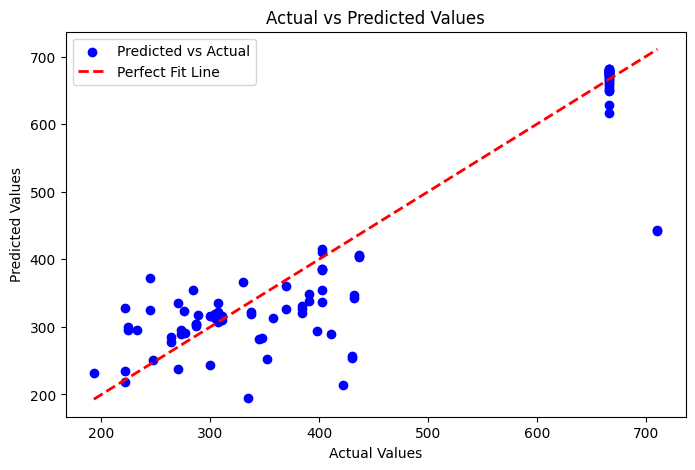

In [61]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, prediction, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()
